In [1]:
# Imports
import warnings
warnings.filterwarnings("ignore")

import sklearn.datasets as datasets
import sklearn.linear_model as linear_model
from scipy import stats

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Load the Boston house dataset

boston_housing = datasets.load_boston()
print(boston_housing.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [3]:
X = boston_housing.data
Y = boston_housing.target

print("X =", X.shape, "\tY =", Y.shape)

X = (506, 13) 	Y = (506,)


In [4]:
def scatter_boston(X_plt, y_plt):
  """ Just a simple scatter plot"""
  
  plt.figure(figsize=(12, 8))
  plt.scatter(X_plt, y_plt, marker="o",
            color="c", edgecolor="black")
  plt.xlabel("Anzahl der Räume", size=12)
  plt.ylabel("Preis in Tausend $", size=12)
  plt.title("Boston Hauspreise 1978", size=15)

In [5]:
""" 
Let's have a look at the average number of rooms
and cut the last 10 datapoints.
"""

X_rooms_train = X[10:,5]
X_rooms_valid = X[:10,5]

Y_train = Y[10:]
Y_valid = Y[:10]

print("Training:", X_rooms_train.shape,
      "Validation:", X_rooms_valid.shape)

Training: (496,) Validation: (10,)


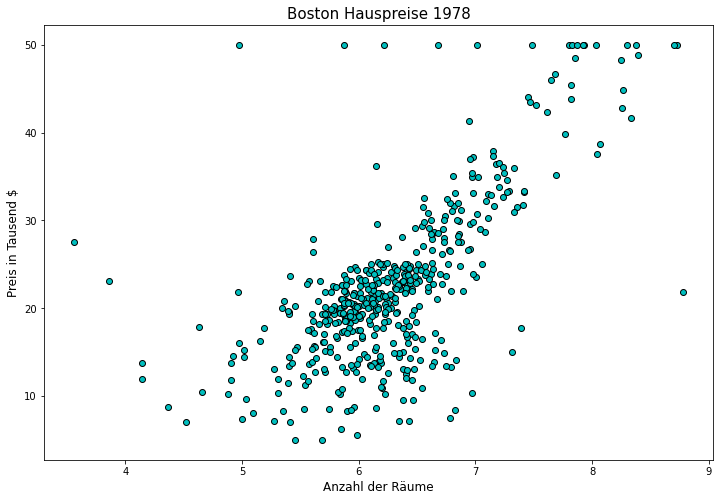

In [6]:
# Plot the datapoints
scatter_boston(X_rooms_train, Y_train)

In [7]:
# Calculate the linear regression with OLS usind sklearn
lr = linear_model.LinearRegression()

# Some reshaping for sklearn
X_rooms_train = X_rooms_train.reshape(-1, 1)
lr.fit(X_rooms_train, Y_train)

# Save the prediction
Y_pred_skl = lr.predict(X_rooms_train)

print("score: ", lr.score(X_rooms_train, Y_train))

score:  0.4799021141851201


In [8]:
"""Calculate the linear regression with OLS usind sklearn """

# We need to reshape to the normal shape
X_rooms_train = X_rooms_train.reshape(len(X_rooms_train))
reg = stats.linregress(X_rooms_train, Y_train)

Y_pred_scipy = reg.intercept + reg.slope*X_rooms_train

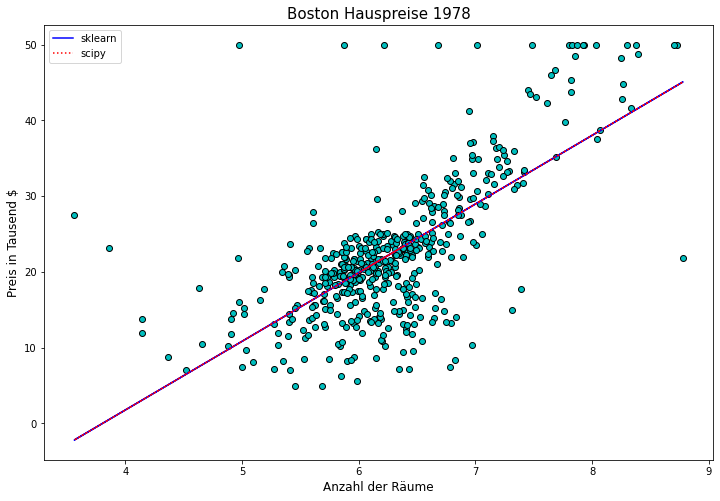

In [9]:
# Let's have a look at the results
scatter_boston(X_rooms_train, Y_train)
plt.plot(X_rooms_train, Y_pred_skl, color="blue",
         label="sklearn")
plt.plot(X_rooms_train, Y_pred_scipy, ":",
         color="red", label="scipy")
plt.legend()
#plt.savefig("boston_fit.pdf",dpi = 300, bbox_inches="tight")
plt.show()

In [10]:
# Lets predict the validation data
X_rooms_valid = X_rooms_valid.reshape(-1, 1)
Y_pred = lr.predict(X_rooms_valid)

print("Predicted value:", np.round(Y_pred,1))
print("Real value:\t", Y_valid)
print("score:", lr.score(X_rooms_valid, Y_valid))

Predicted value: [25.1 23.7 30.6 28.9 30.3 23.8 20.  21.5 16.6 19.9]
Real value:	 [24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9]
score: 0.6578627631669276
